In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
from sklearn.tree import DecisionTreeClassifier, plot_tree,export_graphviz
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_excel('Taxa_rend_escolar_2022.xlsx')
df = df.dropna()

In [ ]:
df = df.replace('--', np.nan)

In [ ]:
display(df)

,Ano,Região,UF,Código do Município,Nome do Município,Código da Escola,Nome da Escola,Localização,Dependência Administrativa,TAef:Total,...,TABef:6º Ano,TABef:7º Ano,TABef:8º Ano,TABef:9º Ano,TABem:Total,TABem:1ª série,TABem:2ª série,TABem:3ª série,TABem:4ª série,TABem:Não-Seriado
0,2022,Norte,RO,1100015,Alta Floresta D'Oeste,11022558,EIEEF HAP BITT TUPARI,Rural,Estadual,100.0,...,1.587623,2.071333,2.701423,2.948457,4.563825,4.307953,4.692287,4.444238,5.125997,10.202174
1,2022,Norte,RO,1100015,Alta Floresta D'Oeste,11024291,EMMEF 7 DE SETEMBRO,Rural,Municipal,88.9,...,1.587623,2.071333,2.701423,2.948457,4.563825,4.307953,4.692287,4.444238,5.125997,10.202174
2,2022,Norte,RO,1100015,Alta Floresta D'Oeste,11024372,EMEIEF ANA NERY,Urbana,Municipal,88.2,...,0.000000,0.000000,0.000000,0.000000,4.563825,4.307953,4.692287,4.444238,5.125997,10.202174
3,2022,Norte,RO,1100015,Alta Floresta D'Oeste,11024666,EMEIEF BOA ESPERANCA,Rural,Municipal,96.2,...,0.000000,0.000000,0.000000,0.000000,4.563825,4.307953,4.692287,4.444238,5.125997,10.202174
4,2022,Norte,RO,1100015,Alta Floresta D'Oeste,11024682,EEEFM EURIDICE LOPES PEDROSO,Urbana,Estadual,93.0,...,0.000000,1.300000,1.100000,2.948457,8.400000,13.400000,9.000000,2.000000,5.125997,10.202174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129302,2022,Centro-Oeste,DF,5300108,Brasília,53084020,ESC PEQUENO ENCANTO,Urbana,Privada,100.0,...,1.587623,2.071333,2.701423,2.948457,4.563825,4.307953,4.692287,4.444238,5.125997,10.202174
129303,2022,Centro-Oeste,DF,5300108,Brasília,53084039,COL ANCHIETA,Urbana,Privada,100.0,...,0.000000,0.000000,0.000000,0.000000,4.563825,4.307953,4.692287,4.444238,5.125997,10.202174
129304,2022,Centro-Oeste,DF,5300108,Brasília,53084055,COL MAPA,Urbana,Privada,99.6,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.125997,10.202174
129305,2022,Centro-Oeste,DF,5300108,Brasília,53085000,COBIAN - COL BIANGULO,Urbana,Privada,100.0,...,1.587623,2.071333,2.701423,2.948457,4.563825,4.307953,4.692287,4.444238,5.125997,10.202174


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129307 entries, 0 to 129306
Data columns (total 63 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Ano                         129307 non-null  int64  
 1   Região                      129307 non-null  object 
 2   UF                          129307 non-null  object 
 3   Código do Município         129307 non-null  int64  
 4   Nome do Município           129307 non-null  object 
 5   Código da Escola            129307 non-null  int64  
 6   Nome da Escola              129307 non-null  object 
 7   Localização                 129307 non-null  object 
 8   Dependência Administrativa  129307 non-null  object 
 9   TAef:Total                  119818 non-null  float64
 10  TAef:Anos Iniciais          102664 non-null  float64
 11  TAef:Anos Finais            61088 non-null   float64
 12  TAef:1º Ano                 95476 non-null   float64
 13  TAef:2º Ano   

In [ ]:
df['TABem:Total'] = pd.to_numeric(df['TABem:Total'], errors = 'coerce')

In [ ]:
for col in df.columns:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].mean())
df.isnull().sum()

Ano                    0
Região                 0
UF                     0
Código do Município    0
Nome do Município      0
                      ..
TABem:1ª série         0
TABem:2ª série         0
TABem:3ª série         0
TABem:4ª série         0
TABem:Não-Seriado      0
Length: 63, dtype: int64

In [ ]:
df.columns

Index(['Ano', 'Região', 'UF', 'Código do Município', 'Nome do Município',
       'Código da Escola', 'Nome da Escola', 'Localização',
       'Dependência Administrativa', 'TAef:Total', 'TAef:Anos Iniciais',
       'TAef:Anos Finais', 'TAef:1º Ano', 'TAef:2º Ano', 'TAef:3º Ano',
       'TAef:4º Ano', ' TAef:5º Ano', 'TAef:6º Ano', 'TAef:7º Ano',
       'TAef:8º Ano', 'TAef:9º Ano', 'TAem:Total', 'TAem:1ª série',
       'TAem:2ª série', 'TAem:3ª série', 'TAem:4ª série', 'TAem:Não-Seriado',
       'TRef: Total', 'TRef:Anos Iniciais', 'TRef:Anos Finais', 'TRef:1º Ano',
       'TRef:2º Ano', 'TRef:3º Ano', 'TRef:4º Ano', ' TRef:5º Ano',
       'TRef:6º Ano', 'TRef:7º Ano', 'TRef:8º Ano', 'TRef:9º Ano',
       'TRem:Total', 'TRem:1ª série', 'TRem:2ª série', 'TRem:3ª série',
       'TRem:4ª série', 'TRem:Não-Seriado', 'TABef:Total',
       'TABef:Anos Iniciais', 'TABef:Anos Finais', 'TABef:1º Ano',
       'TABef:2º Ano', 'TABef:3º Ano', 'TABef:4º Ano', ' TABef:5º Ano',
       'TABef:6º Ano', 

In [ ]:
df = df.drop(['Código do Município', 'Nome do Município','Código da Escola', 'Nome da Escola','TAef:Total', 'TAef:Anos Iniciais',
       'TAef:Anos Finais', 'TAef:1º Ano', 'TAef:2º Ano', 'TAef:3º Ano',
       'TAef:4º Ano', ' TAef:5º Ano', 'TAef:6º Ano', 'TAef:7º Ano',
       'TAef:8º Ano', 'TAef:9º Ano', 'TAem:Total', 'TAem:1ª série',
       'TAem:2ª série', 'TAem:3ª série', 'TAem:4ª série', 'TAem:Não-Seriado',
       'TRef: Total', 'TRef:Anos Iniciais', 'TRef:Anos Finais', 'TRef:1º Ano',
       'TRef:2º Ano', 'TRef:3º Ano', 'TRef:4º Ano', ' TRef:5º Ano',
       'TRef:6º Ano', 'TRef:7º Ano', 'TRef:8º Ano', 'TRef:9º Ano',
       'TRem:Total', 'TRem:1ª série', 'TRem:2ª série', 'TRem:3ª série',
       'TRem:4ª série', 'TRem:Não-Seriado', 'TABef:Total',
       'TABef:Anos Iniciais', 'TABef:Anos Finais', 'TABef:1º Ano',
       'TABef:2º Ano', 'TABef:3º Ano', 'TABef:4º Ano', ' TABef:5º Ano',
       'TABef:6º Ano', 'TABef:7º Ano', 'TABef:8º Ano', 'TABef:9º Ano',], axis=1)

In [ ]:
display(df)

,Ano,Região,UF,Localização,Dependência Administrativa,TABem:Total,TABem:1ª série,TABem:2ª série,TABem:3ª série,TABem:4ª série,TABem:Não-Seriado
0,2022,Norte,RO,Rural,Estadual,4.563825,4.307953,4.692287,4.444238,5.125997,10.202174
1,2022,Norte,RO,Rural,Municipal,4.563825,4.307953,4.692287,4.444238,5.125997,10.202174
2,2022,Norte,RO,Urbana,Municipal,4.563825,4.307953,4.692287,4.444238,5.125997,10.202174
3,2022,Norte,RO,Rural,Municipal,4.563825,4.307953,4.692287,4.444238,5.125997,10.202174
4,2022,Norte,RO,Urbana,Estadual,8.400000,13.400000,9.000000,2.000000,5.125997,10.202174
...,...,...,...,...,...,...,...,...,...,...,...
129302,2022,Centro-Oeste,DF,Urbana,Privada,4.563825,4.307953,4.692287,4.444238,5.125997,10.202174
129303,2022,Centro-Oeste,DF,Urbana,Privada,4.563825,4.307953,4.692287,4.444238,5.125997,10.202174
129304,2022,Centro-Oeste,DF,Urbana,Privada,0.000000,0.000000,0.000000,0.000000,5.125997,10.202174
129305,2022,Centro-Oeste,DF,Urbana,Privada,4.563825,4.307953,4.692287,4.444238,5.125997,10.202174


In [ ]:
df['Região'].unique()
df['UF'].unique()
df['Localização'].unique()
df['Dependência Administrativa'].unique()

array(['Estadual', 'Municipal', 'Privada', 'Federal'], dtype=object)

In [ ]:
dummy_df = pd.get_dummies(df[['Região','UF','Localização','Dependência Administrativa']])
display(dummy_df)

,Região_Centro-Oeste,Região_Nordeste,Região_Norte,Região_Sudeste,Região_Sul,UF_AC,UF_AL,UF_AM,UF_AP,UF_BA,...,UF_SC,UF_SE,UF_SP,UF_TO,Localização_Rural,Localização_Urbana,Dependência Administrativa_Estadual,Dependência Administrativa_Federal,Dependência Administrativa_Municipal,Dependência Administrativa_Privada
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129302,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
129303,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
129304,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
129305,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [ ]:
df = pd.concat([df, dummy_df], axis=1)

In [ ]:
df = df.drop(['Região','UF','Localização','Dependência Administrativa'], axis = 1)


KeyError: "['Região', 'UF', 'Localização', 'Dependência Administrativa'] not found in axis"

In [ ]:
df[['TABem:Total']] = (df[['TABem:Total']] > 0).astype(int)

In [ ]:
display(df)

,Ano,TABem:Total,TABem:1ª série,TABem:2ª série,TABem:3ª série,TABem:4ª série,TABem:Não-Seriado,Região_Centro-Oeste,Região_Nordeste,Região_Norte,...,UF_SC,UF_SE,UF_SP,UF_TO,Localização_Rural,Localização_Urbana,Dependência Administrativa_Estadual,Dependência Administrativa_Federal,Dependência Administrativa_Municipal,Dependência Administrativa_Privada
0,2022,1,4.307953,4.692287,4.444238,5.125997,10.202174,0,0,1,...,0,0,0,0,1,0,1,0,0,0
1,2022,1,4.307953,4.692287,4.444238,5.125997,10.202174,0,0,1,...,0,0,0,0,1,0,0,0,1,0
2,2022,1,4.307953,4.692287,4.444238,5.125997,10.202174,0,0,1,...,0,0,0,0,0,1,0,0,1,0
3,2022,1,4.307953,4.692287,4.444238,5.125997,10.202174,0,0,1,...,0,0,0,0,1,0,0,0,1,0
4,2022,1,13.400000,9.000000,2.000000,5.125997,10.202174,0,0,1,...,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129302,2022,1,4.307953,4.692287,4.444238,5.125997,10.202174,1,0,0,...,0,0,0,0,0,1,0,0,0,1
129303,2022,1,4.307953,4.692287,4.444238,5.125997,10.202174,1,0,0,...,0,0,0,0,0,1,0,0,0,1
129304,2022,0,0.000000,0.000000,0.000000,5.125997,10.202174,1,0,0,...,0,0,0,0,0,1,0,0,0,1
129305,2022,1,4.307953,4.692287,4.444238,5.125997,10.202174,1,0,0,...,0,0,0,0,0,1,0,0,0,1


In [ ]:

features = df.drop(['TABem:Total','TABem:Não-Seriado'], axis=1)
target = df['TABem:Total']

xtrain, xtest, ytrain, ytest = train_test_split(features, target, test_size=0.2, random_state=40)

xtrain.shape, xtest.shape

norm = MinMaxScaler()
xtrain = norm.fit_transform(xtrain)
xtest = norm.transform(xtest)

In [ ]:
modelo = DecisionTreeClassifier(criterion = 'gini', max_depth= 7)

In [ ]:
models = {
    'Regressão Logistica' : LogisticRegression(),
    'k-NN': KNeighborsClassifier(),
    'SVC' : SVC(),
    'Arvore de Decisão' : modelo,
}

for name, modelo in models.items():
  modelo.fit(xtrain, ytrain)
  y_pred = modelo.predict(xtest)
  accuracy = accuracy_score(ytest, y_pred)
  metricas = metrics.classification_report(ytest,modelo.predict(xtest))
  print(f'{name} : Acurácia = {accuracy : .2f}')
  print(f'{name} : Metricas  \n {metricas :}' )

Regressão Logistica : Acurácia =  0.98
Regressão Logistica : Metricas  
               precision    recall  f1-score   support

           0       0.88      0.91      0.89      2498
           1       0.99      0.99      0.99     23364

    accuracy                           0.98     25862
   macro avg       0.93      0.95      0.94     25862
weighted avg       0.98      0.98      0.98     25862

k-NN : Acurácia =  0.99
k-NN : Metricas  
               precision    recall  f1-score   support

           0       0.94      0.97      0.96      2498
           1       1.00      0.99      1.00     23364

    accuracy                           0.99     25862
   macro avg       0.97      0.98      0.98     25862
weighted avg       0.99      0.99      0.99     25862

SVC : Acurácia =  0.97
SVC : Metricas  
               precision    recall  f1-score   support

           0       0.87      0.85      0.86      2498
           1       0.98      0.99      0.99     23364

    accuracy             

In [ ]:
len(y_pred)

25862

In [ ]:
valores_reais = df['TABem:Total'].sample(n=25862, random_state = 42)
saida_regressao = models['Regressão Logistica'].predict(xtest)
saida_svc = models['SVC'].predict(xtest)
saida_knn = models['k-NN'].predict(xtest)
saida_arvore = models['Arvore de Decisão'].predict(xtest)

teste = {'valores_reais': valores_reais,
                     'Regressao' : saida_regressao,
                     'SVC': saida_svc,
                     'K-NN': saida_knn,
                     'Arvore de Decisão' : saida_arvore,
                    }

data = pd.DataFrame(teste)

array([[<Axes: title={'center': 'valores_reais'}>,
        <Axes: title={'center': 'Regressao'}>],
       [<Axes: title={'center': 'SVC'}>,
        <Axes: title={'center': 'K-NN'}>],
       [<Axes: title={'center': 'Arvore de Decisão'}>, <Axes: >]],
      dtype=object)

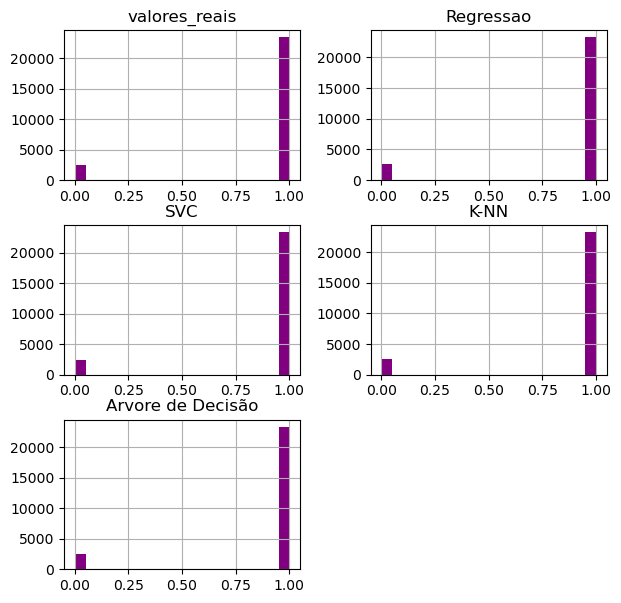

In [ ]:
data.hist(bins = 20, color ='purple' ,figsize=(7,7))

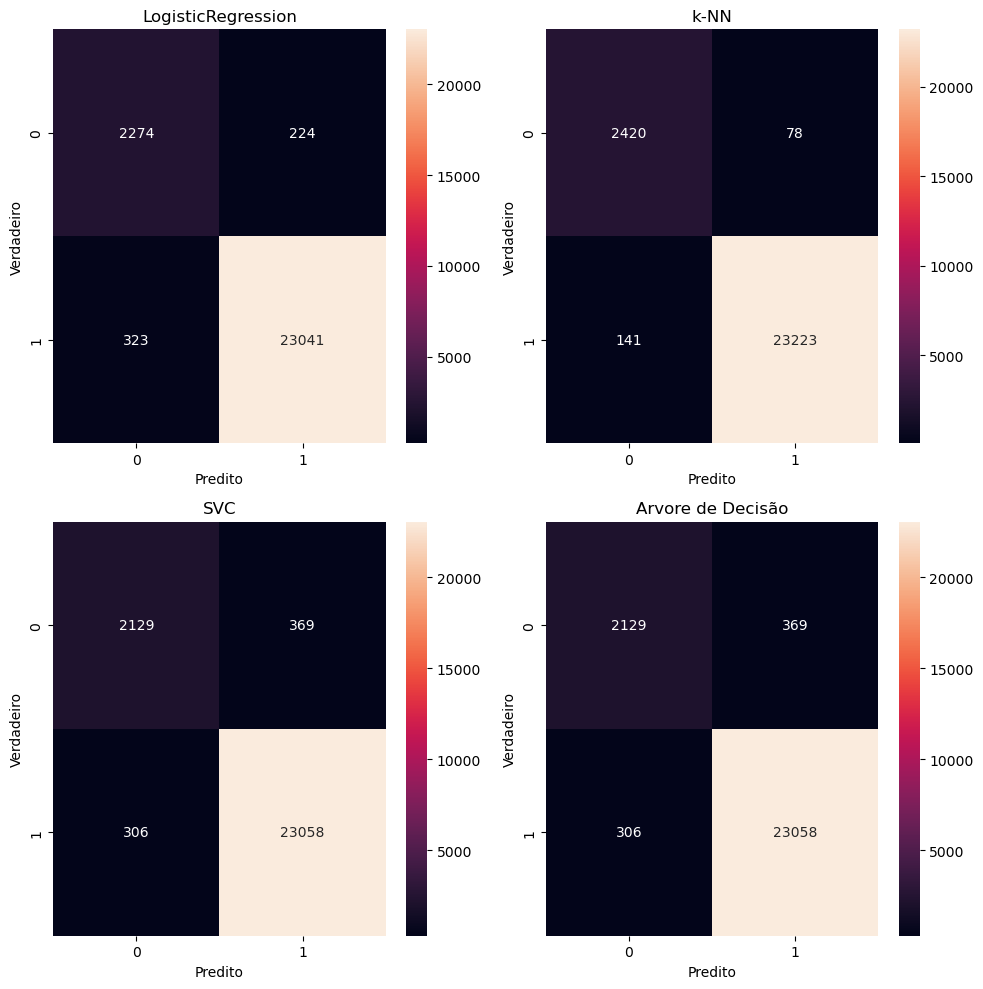

In [ ]:
cm1 = confusion_matrix(ytest, models['Regressão Logistica'].predict(xtest))
cm2 = confusion_matrix(ytest, models['k-NN'].predict(xtest))
cm3 = confusion_matrix(ytest, models['SVC'].predict(xtest))
cm4 = confusion_matrix(ytest, models['Arvore de Decisão'].predict(xtest))

fig, axs = plt.subplots(2, 2, figsize=(10, 10))

sns.heatmap(cm1, annot=True, fmt='g', ax=axs[0, 0])
axs[0, 0].set_title('LogisticRegression')
axs[0, 0].set_xlabel('Predito')
axs[0, 0].set_ylabel('Verdadeiro')

# Plotar a matriz 2
sns.heatmap(cm2, annot=True, fmt='g', ax=axs[0, 1])
axs[0, 1].set_title('k-NN')
axs[0, 1].set_xlabel('Predito')
axs[0, 1].set_ylabel('Verdadeiro')

# Plotar a matriz 3
sns.heatmap(cm3, annot=True,fmt='g', ax=axs[1, 0])
axs[1, 0].set_title('SVC')
axs[1, 0].set_xlabel('Predito')
axs[1, 0].set_ylabel('Verdadeiro')

sns.heatmap(cm4, annot=True,fmt='g', ax=axs[1, 1])
axs[1, 1].set_title('Arvore de Decisão')
axs[1, 1].set_xlabel('Predito')
axs[1, 1].set_ylabel('Verdadeiro')

plt.tight_layout()
plt.show()

In [ ]:
valores_reais.value_counts()

1    23401
0     2461
Name: TABem:Total, dtype: int64

In [ ]:
importancias = models['Arvore de Decisão'].feature_importances_
nomes_features = df.columns

# Imprimir importância das características
for feature, importancia in zip(nomes_features, importancias):
    print(feature, importancia)

Ano 0.0
TABem:Total 0.7815725885846245
TABem:1ª série 0.13443967417407876
TABem:2ª série 0.07387967146359178
TABem:3ª série 0.0010615781473570572
TABem:4ª série 0.0
TABem:Não-Seriado 0.0
Região_Centro-Oeste 0.0
Região_Nordeste 0.0
Região_Norte 0.0
Região_Sudeste 0.0
Região_Sul 0.0
UF_AC 0.0
UF_AL 0.0
UF_AM 1.239893102470006e-08
UF_AP 0.00011193488615317118
UF_BA 9.54261047969752e-05
UF_CE 0.0
UF_DF 0.0
UF_ES 0.00064839547801673
UF_GO 0.0
UF_MA 1.2794054092304403e-05
UF_MG 0.0003228566224249774
UF_MS 0.0
UF_MT 5.6388152834575897e-05
UF_PA 2.1297322691263392e-05
UF_PB 0.00012304945092241534
UF_PE 0.0
UF_PI 0.0
UF_PR 0.0
UF_RJ 0.0
UF_RN 0.0
UF_RO 0.0
UF_RR 0.0
UF_RS 0.0
UF_SC 0.0
UF_SE 0.0
UF_SP 0.000360884178141288
UF_TO 0.00019553660816347217
Localização_Rural 2.921681228481534e-05
Localização_Urbana 0.00011353073757183238
Dependência Administrativa_Estadual 6.264716205002105e-06
Dependência Administrativa_Federal 0.006948900107117925
